# Initial analysis - Prevention duties

In [140]:
#Setting up environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [141]:
#Importing data

df_duties = pd.read_csv('C:/Users/lucyf/Coding/Homelessness/data/joined_df_A2P.csv')

df.head()

,ONS_code,local_authority,year,quarter,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other_x,percentage_AST_total,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,total_successful_prevention,total_PRS,PRS_sc,PRS_HMO,PRS_lodging,total_SRS,SRS_council,SRS_RP,SRS_supported,family,friends,owner_occupier,other_y,not_known,proportion_prevented,percentage_total_PRS,percentage_total_SRS
0,E07000223,Adur,2022,3,9.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.67,0.22,0.00,0.11,5.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.555556,0.40,0.40
1,E07000026,Allerdale,2022,3,49.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,1.0,2.0,10.0,5.0,8.0,0.0,4.0,1.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,5.0,0.27,0.20,0.10,0.16,33.0,6.0,6.0,0.0,0.0,16.0,0.0,12.0,4.0,5.0,3.0,2.0,1.0,0.0,0.673469,0.18,0.48
2,E07000032,Amber Valley,2022,3,63.0,21.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,6.0,1.0,23.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0,2.0,0.33,0.37,0.13,0.06,65.0,14.0,13.0,0.0,1.0,46.0,1.0,34.0,11.0,3.0,1.0,0.0,1.0,0.0,1.031746,0.22,0.71
3,E07000224,Arun,2022,3,84.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,34.0,0.0,0.0,0.0,2.0,2.0,24.0,4.0,0.0,2.0,6.0,4.0,0.0,2.0,4.0,0.0,1.0,3.0,0.0,1.0,1.0,0.48,0.29,0.05,0.00,54.0,35.0,30.0,4.0,1.0,14.0,4.0,4.0,6.0,2.0,0.0,0.0,1.0,2.0,0.642857,0.65,0.26
4,E07000170,Ashfield,2022,3,51.0,31.0,1.0,0.0,0.0,0.0,1.0,0.0,24.0,1.0,0.0,0.0,4.0,1.0,6.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.61,0.12,0.06,0.14,14.0,3.0,3.0,0.0,0.0,10.0,6.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.274510,0.21,0.71


# Analysis of prevention duties owed

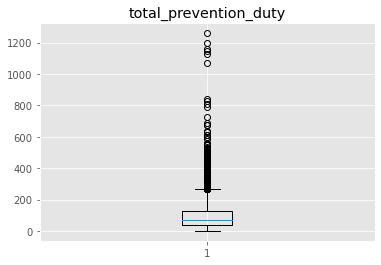

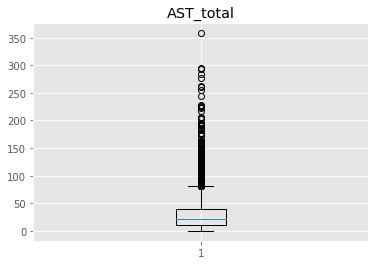

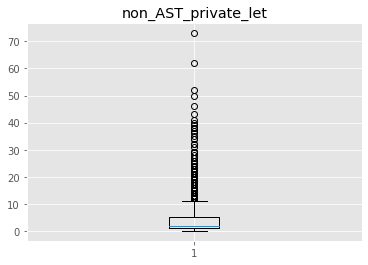

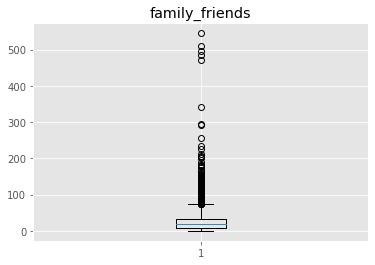

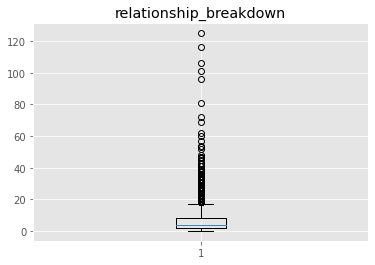

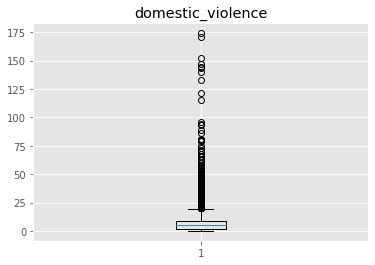

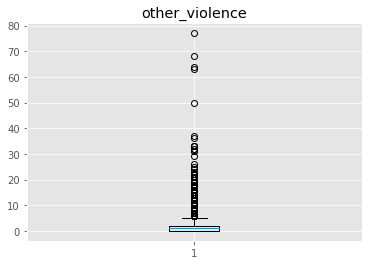

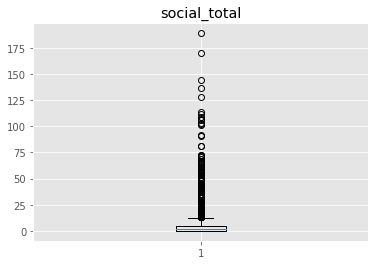

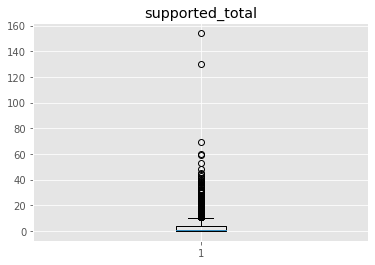

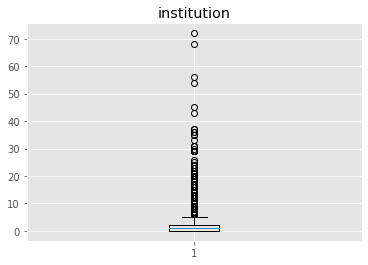

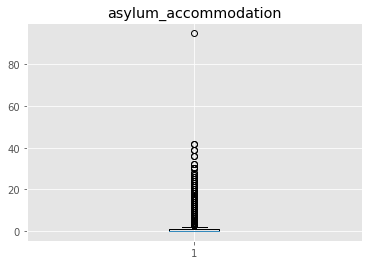

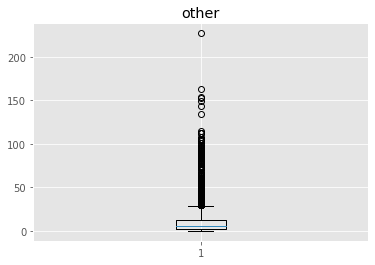

<Figure size 432x288 with 0 Axes>

In [142]:
#Checking for outliers using boxplots

for column in ['total_prevention_duty', 'AST_total', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'supported_total', 'institution', 'asylum_accommodation', 'other']:
    if df_duties[column].dtype == 'float64':
        plt.boxplot(df_duties[column])
        plt.title(column)
        plt.show()
        plt.clf()

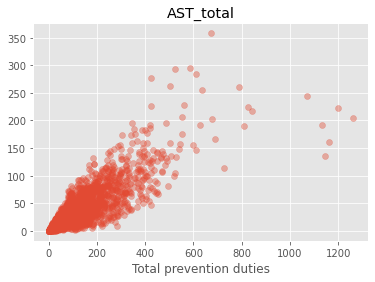

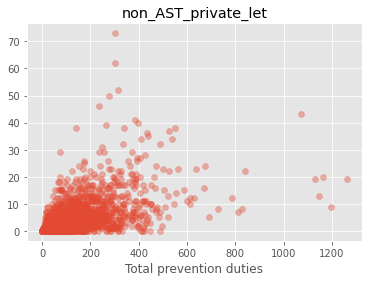

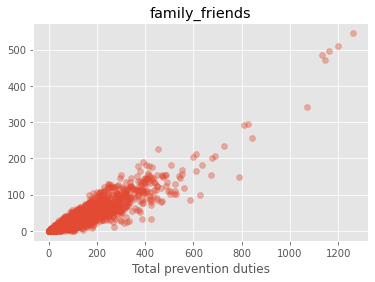

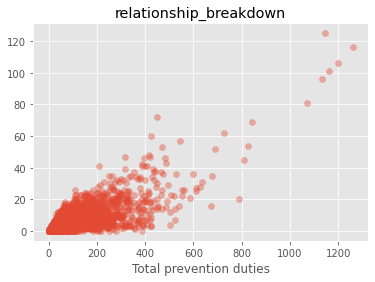

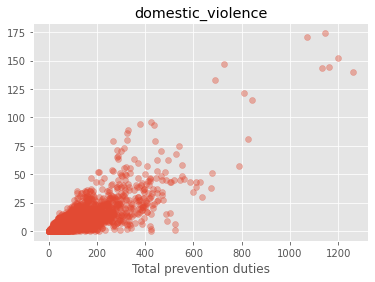

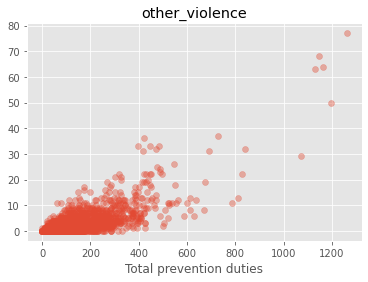

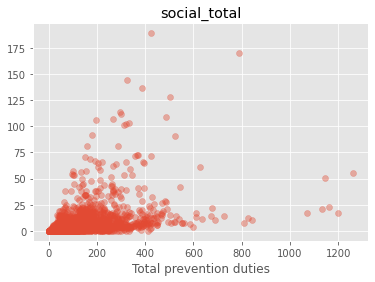

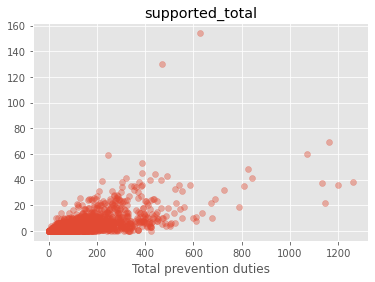

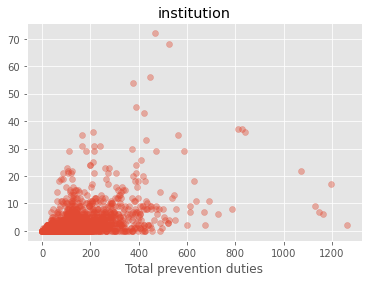

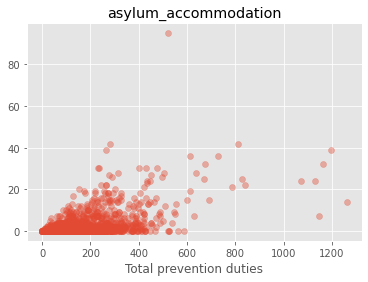

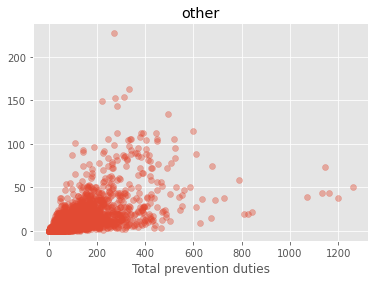

<Figure size 432x288 with 0 Axes>

In [143]:
#Checking for outliers using scatterplots
#Each should show a strong correlation

for column in ['AST_total', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'supported_total', 'institution', 'asylum_accommodation', 'other']:
    plt.scatter(df_duties['total_prevention_duty'], df_duties[column], alpha=0.4)
    plt.title(column)
    plt.xlabel('Total prevention duties')
    plt.show()
    plt.clf()

In [144]:
#Filtering the dataset to just show the aggregated categories

df_categories = df_duties[['ONS_code', 'local_authority', 'total_prevention_duty', 'AST_total', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'supported_total', 'institution', 'asylum_accommodation', 'other']]
df_categories.head()

,ONS_code,local_authority,total_prevention_duty,AST_total,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,supported_total,institution,asylum_accommodation,other
0,E07000223,Adur,9.0,6.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,E07000026,Allerdale,49.0,13.0,2.0,10.0,5.0,8.0,0.0,4.0,1.0,1.0,0.0,5.0
2,E07000032,Amber Valley,63.0,21.0,1.0,23.0,8.0,4.0,0.0,0.0,3.0,1.0,0.0,2.0
3,E07000224,Arun,84.0,40.0,2.0,24.0,4.0,0.0,2.0,6.0,4.0,0.0,1.0,1.0
4,E07000170,Ashfield,51.0,31.0,1.0,6.0,3.0,7.0,0.0,0.0,0.0,1.0,0.0,2.0


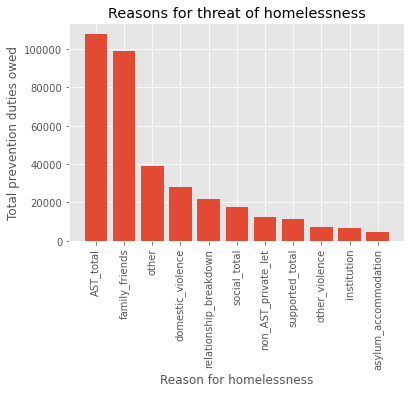

<Figure size 432x288 with 0 Axes>

In [145]:
#Plotting a bar chart showing the most common reasons for threat of homelessness

homelessness_reasons = df_categories.columns[3:]
homelessness_reasons_summed = df_duties[homelessness_reasons].sum().sort_values(ascending=False)

plt.bar(homelessness_reasons_summed.index, homelessness_reasons_summed)
plt.xticks(rotation=90)
plt.title('Reasons for threat of homelessness')
plt.xlabel('Reason for homelessness')
plt.ylabel('Total prevention duties owed')
plt.show()
plt.clf()

In [146]:
#Calculating the above reasons for homelessness as a proportion of the total, for each local authority

for column in homelessness_reasons:
    df_duties['percentage_' + column] = (df_duties[column] / df_duties['total_prevention_duty']).round(2)

In [147]:
#Showing a filtered dataframe with just the calculated percentages

df_percentages = df_duties.filter(df_duties.columns[0:2].tolist() + [column for column in df_duties.columns if 'percentage' in column])

display(df_percentages.head())

df_percentages.describe()

,ONS_code,local_authority,percentage_AST_total,percentage_non_AST_private_let,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,percentage_other_violence,percentage_social_total,percentage_supported_total,percentage_institution,percentage_asylum_accommodation,percentage_other
0,E07000223,Adur,0.67,0.00,0.22,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00
1,E07000026,Allerdale,0.27,0.04,0.20,0.10,0.16,0.00,0.08,0.02,0.02,0.00,0.10
2,E07000032,Amber Valley,0.33,0.02,0.37,0.13,0.06,0.00,0.00,0.05,0.02,0.00,0.03
3,E07000224,Arun,0.48,0.02,0.29,0.05,0.00,0.02,0.07,0.05,0.00,0.01,0.01
4,E07000170,Ashfield,0.61,0.02,0.12,0.06,0.14,0.00,0.00,0.00,0.02,0.00,0.04


,percentage_AST_total,percentage_non_AST_private_let,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,percentage_other_violence,percentage_social_total,percentage_supported_total,percentage_institution,percentage_asylum_accommodation,percentage_other
count,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000,3404.000000
mean,0.326522,0.038640,0.265893,0.070420,0.075156,0.017212,0.044462,0.025999,0.015297,0.007518,0.113434
std,0.155444,0.044506,0.112551,0.056878,0.057006,0.026417,0.063171,0.032499,0.026197,0.017806,0.104796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210000,0.010000,0.190000,0.030000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
50%,0.310000,0.030000,0.260000,0.060000,0.070000,0.010000,0.030000,0.020000,0.000000,0.000000,0.090000
75%,0.420000,0.050000,0.340000,0.090000,0.100000,0.030000,0.050000,0.040000,0.020000,0.010000,0.160000
max,1.000000,0.470000,1.000000,1.000000,0.500000,1.000000,0.570000,0.340000,0.260000,0.180000,1.000000


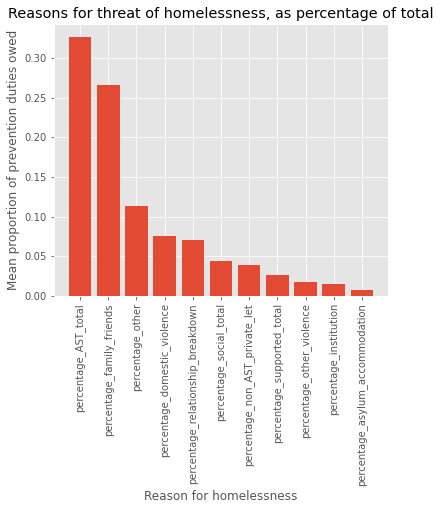

In [148]:
#Showing the calculated percentages as a bar chart

percentages_mean = df_duties[df_percentages.columns[2:]].mean()
percentages_mean_sorted = df_duties[df_percentages.columns[2:]].mean().sort_values(ascending=False)

fig = plt.subplots(figsize=(6, 5))
plt.bar(percentages_mean_sorted.index, percentages_mean_sorted)
plt.xticks(rotation=90)
plt.title('Reasons for threat of homelessness, as percentage of total')
plt.xlabel('Reason for homelessness')
plt.ylabel('Mean proportion of prevention duties owed')
plt.show()

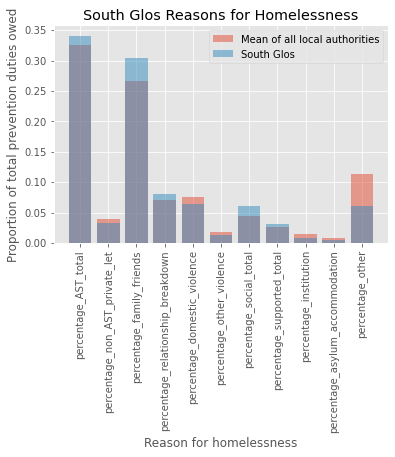

In [149]:
#Analysing South Gloucestershire as an example comparator

df_SG = df_duties[df_duties['local_authority'] == 'South Gloucestershire']
df_percentages_SG = df_SG.filter(df_SG.columns[0:2].tolist() + [column for column in df_SG.columns if 'percentage' in column])
percentages_mean_SG = df_SG[df_percentages.columns[2:]].mean()

plt.bar(percentages_mean.index, percentages_mean, label='Mean of all local authorities', alpha=0.5)
plt.bar(percentages_mean_SG.index, percentages_mean_SG, label='South Glos', alpha=0.5)
plt.xticks(rotation=90)
plt.title('South Glos Reasons for Homelessness')
plt.xlabel('Reason for homelessness')
plt.ylabel('Proportion of total prevention duties owed')
plt.legend()
plt.show()

#Later, it would be nice to reorder the bars so they are in descending order for either South Glos or all local authorities

In [150]:
#Grouping data by quarter

total_per_quarter = df_duties.groupby(['year', 'quarter'])['total_prevention_duty'].sum()

display(total_per_quarter)

#Reformatting index so it displays correctly on graph
print(total_per_quarter.index)
total_per_quarter.index = total_per_quarter.index.map(lambda x: f"Q{x[1]}-{x[0]}")

year  quarter
2020  1          25854.0
      2          32472.0
      3          29067.0
      4          33012.0
2021  1          31826.0
      2          31758.0
      3          32242.0
      4          37749.0
2022  1          34384.0
      2          35190.0
      3          31463.0
Name: total_prevention_duty, dtype: float64

MultiIndex([(2020, 1),
            (2020, 2),
            (2020, 3),
            (2020, 4),
            (2021, 1),
            (2021, 2),
            (2021, 3),
            (2021, 4),
            (2022, 1),
            (2022, 2),
            (2022, 3)],
           names=['year', 'quarter'])


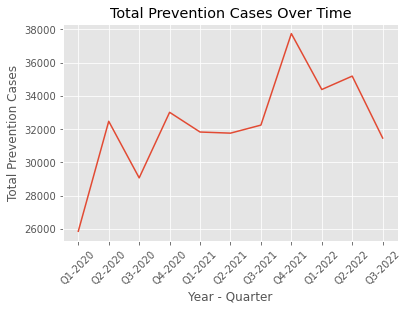

In [151]:
#Line chart showing how the total number of prevention cases have changed over time

plt.plot(total_per_quarter.index, total_per_quarter.values)
plt.xticks(rotation=45)
plt.ylabel('Total Prevention Cases')
plt.xlabel('Year - Quarter')
plt.title('Total Prevention Cases Over Time')
plt.show()

In [152]:
#Creating function to create quarterly data for each homelessness reason

def data_per_quarter(column):
    grouped_df = df_duties.groupby(['year', 'quarter'])[column].sum()
    grouped_df.index = grouped_df.index.map(lambda x: f"Q{x[1]}-{x[0]}")
    return grouped_df

AST_quarterly = data_per_quarter('AST_total')
relationship_breakdown_quarterly = data_per_quarter('relationship_breakdown')
domestic_violence_quarterly = data_per_quarter('domestic_violence')
social_quarterly = data_per_quarter('social_total')
supported_quarterly = data_per_quarter('supported_total')
institution_quarterly = data_per_quarter('institution')
asylum_quarterly = data_per_quarter('asylum_accommodation')

reasons_by_quarter = [AST_quarterly, relationship_breakdown_quarterly, domestic_violence_quarterly, social_quarterly, supported_quarterly, institution_quarterly, asylum_quarterly]

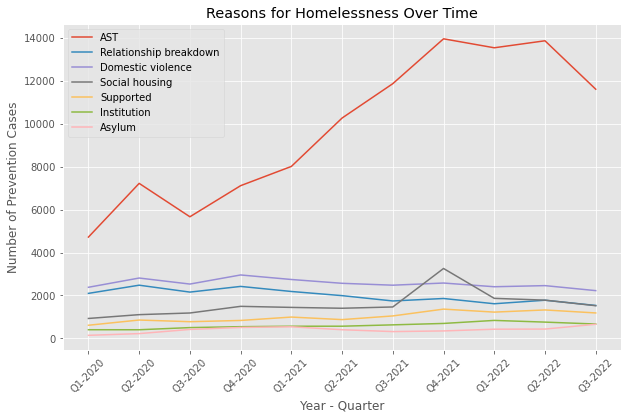

In [153]:
#Line chart showing how the reasons for homelessness have changed over time

fig = plt.subplots(figsize=(10,6))

for data in reasons_by_quarter:
    plt.plot(data.index, data.values)
plt.xticks(rotation=45)
plt.ylabel('Number of Prevention Cases')
plt.xlabel('Year - Quarter')
plt.title('Reasons for Homelessness Over Time')
plt.legend(['AST', 'Relationship breakdown', 'Domestic violence', 'Social housing', 'Supported', 'Institution', 'Asylum'])
plt.show()

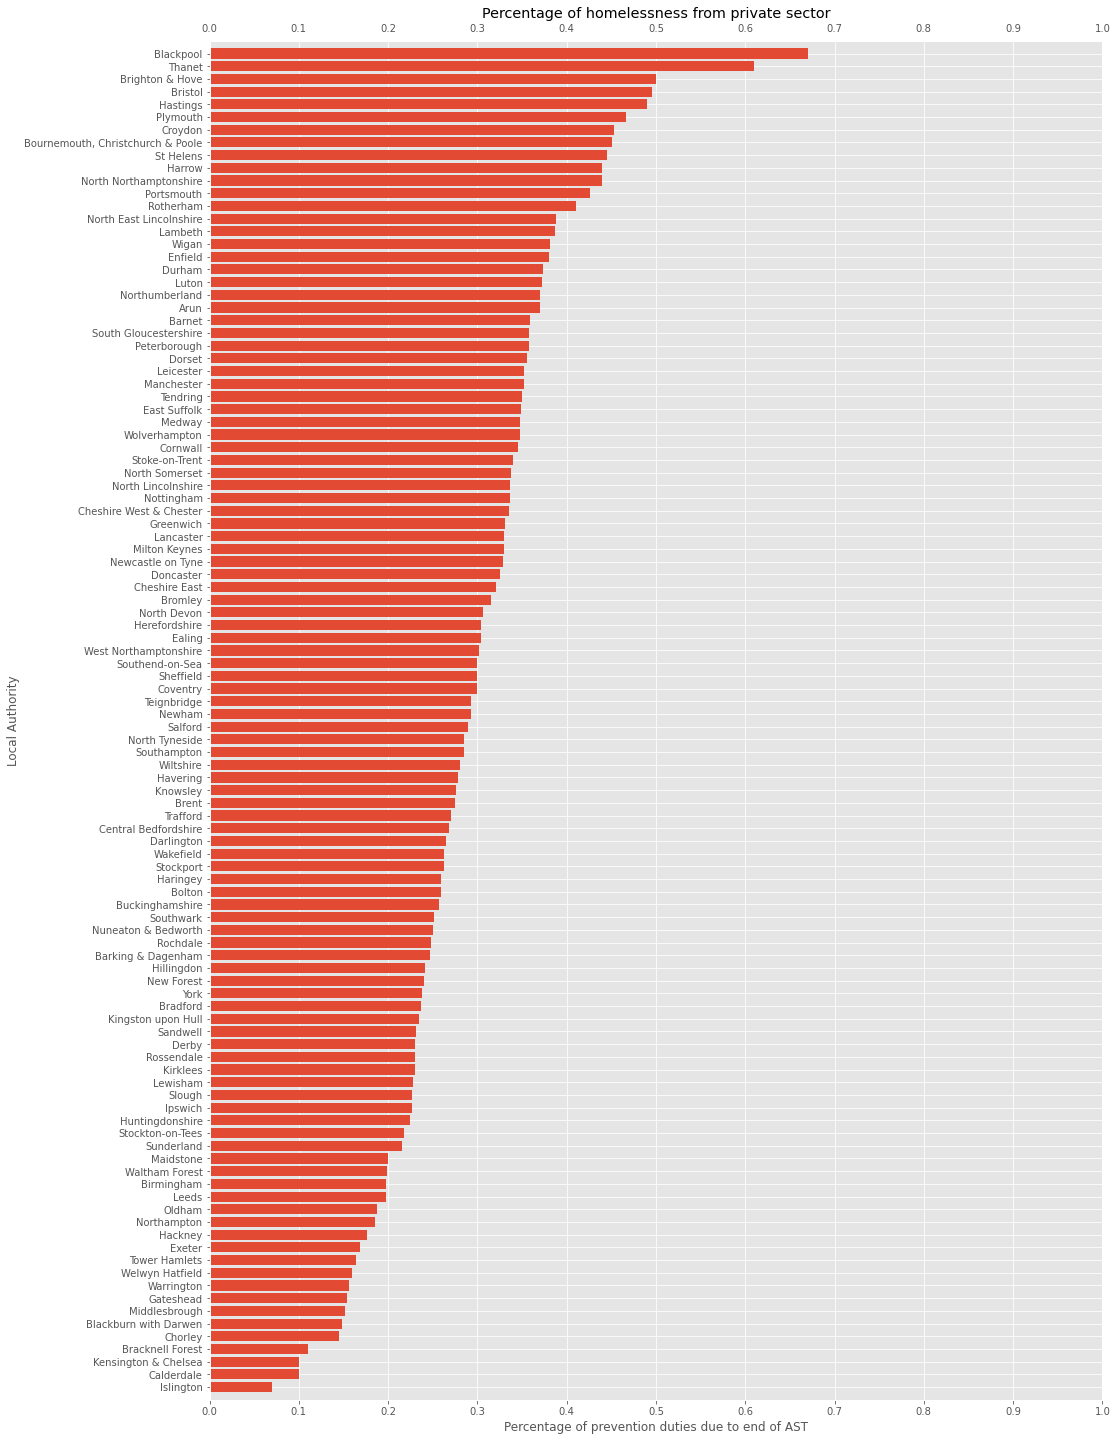

In [154]:
#Which authorities have the highest percentage of homelessness from the private sector?

#Filter to just show authorities with over 150 prevention cases per quarter. These percentages will be more meaningful.
over_150_preventions = df_duties[df_duties['total_prevention_duty'] > 150]

#For each authority, average the percentage of homelessness from AST across the quarters
to_plot = over_150_preventions.groupby('local_authority')['percentage_AST_total'].mean().sort_values()

#Plot onto a bar chart

fig, ax = plt.subplots(figsize=(16, 25))
ax.barh(to_plot.index, to_plot)
plt.title('Percentage of homelessness from private sector')
plt.xlabel('Percentage of prevention duties due to end of AST')
plt.ylabel('Local Authority')
plt.xticks(np.arange(0, 1.1, 0.1))
ax.tick_params(labeltop=True)
plt.ylim(-1, 106)
plt.show()

# Analysis of successful preventions

In [155]:
df = pd.read_csv('C:/Users/lucyf/Coding/Homelessness/data/master_df.csv')

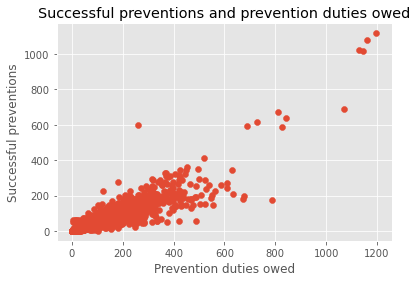

In [156]:
#Checking correlation. Successful preventions should correlate with number of prevention duties owed.

plt.scatter(df['total_prevention_duty'], df['total_successful_prevention'])
plt.xlabel('Prevention duties owed')
plt.ylabel('Successful preventions')
plt.title('Successful preventions and prevention duties owed')
plt.show()

In [157]:
#Checking the outlier where the number of successful preventions is significantly more than the number of duties owed

display(df[(df['total_successful_prevention'] > 400) & (df['total_prevention_duty'] < 400)])

,ONS_code,local_authority,year,quarter,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other_x,percentage_AST_total,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,total_successful_prevention,total_PRS,PRS_sc,PRS_HMO,PRS_lodging,total_SRS,SRS_council,SRS_RP,SRS_supported,family,friends,owner_occupier,other_y,not_known,proportion_prevented,percentage_total_PRS,percentage_total_SRS
2808,E08000025,Birmingham,2020,1,258.0,19.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,11.0,5.0,120.0,10.0,21.0,13.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,3.0,2.0,0.0,63.0,0.07,0.47,0.04,0.08,599.0,338.0,265.0,72.0,1.0,88.0,37.0,22.0,29.0,53.0,15.0,3.0,76.0,26.0,2.321705,0.56,0.15


In [158]:
#Checking the rows with significantly higher numbers in both categories

display(df[(df['total_prevention_duty'] > 750)])

#All but one are Leeds. This suggests that Leeds is reporting data differently from other local authorities.

,ONS_code,local_authority,year,quarter,total_prevention_duty,AST_total,AST_arrears_budgeting,AST_arrears_rent_increase,AST_arrears_employment_reduction,AST_arrears_benefit_reduction,AST_arrears_personal_circs,AST_breach,AST_LL_sell_relet,AST_disrepair_complaint,AST_illegal_eviction,AST_abandoned,AST_other,non_AST_private_let,family_friends,relationship_breakdown,domestic_violence,other_violence,social_total,social_arrears,social_breach,social_other,supported_total,supported_arrears,supported_breach,supported_other,institution,asylum_accommodation,other_x,percentage_AST_total,percentage_family_friends,percentage_relationship_breakdown,percentage_domestic_violence,total_successful_prevention,total_PRS,PRS_sc,PRS_HMO,PRS_lodging,total_SRS,SRS_council,SRS_RP,SRS_supported,family,friends,owner_occupier,other_y,not_known,proportion_prevented,percentage_total_PRS,percentage_total_SRS
143,E08000035,Leeds,2022,3,810.0,190.0,5.0,0.0,5.0,3.0,5.0,3.0,139.0,0.0,3.0,2.0,25.0,7.0,293.0,45.0,121.0,13.0,8.0,1.0,2.0,5.0,35.0,0.0,5.0,30.0,37.0,42.0,19.0,0.23,0.36,0.06,0.15,670.0,154.0,140.0,11.0,3.0,133.0,59.0,8.0,66.0,247.0,123.0,3.0,6.0,4.0,0.827160,0.23,0.20
452,E08000035,Leeds,2022,2,826.0,225.0,8.0,2.0,3.0,3.0,7.0,3.0,161.0,3.0,2.0,6.0,27.0,8.0,295.0,54.0,81.0,22.0,12.0,4.0,3.0,5.0,48.0,2.0,4.0,42.0,37.0,25.0,19.0,0.27,0.36,0.07,0.10,590.0,145.0,130.0,12.0,3.0,118.0,35.0,7.0,76.0,213.0,102.0,3.0,6.0,3.0,0.714286,0.25,0.20
761,E08000035,Leeds,2022,1,841.0,217.0,7.0,4.0,1.0,1.0,9.0,2.0,164.0,3.0,4.0,2.0,20.0,22.0,255.0,69.0,115.0,32.0,10.0,3.0,1.0,6.0,41.0,3.0,6.0,32.0,36.0,22.0,22.0,0.26,0.30,0.08,0.14,636.0,173.0,155.0,18.0,0.0,151.0,60.0,8.0,83.0,187.0,115.0,5.0,3.0,2.0,0.756243,0.27,0.24
1070,E08000035,Leeds,2021,4,1072.0,245.0,3.0,1.0,2.0,1.0,7.0,2.0,192.0,11.0,10.0,2.0,14.0,43.0,341.0,81.0,171.0,29.0,17.0,8.0,1.0,8.0,60.0,3.0,11.0,46.0,22.0,24.0,39.0,0.23,0.32,0.08,0.16,687.0,211.0,189.0,21.0,1.0,147.0,66.0,11.0,70.0,206.0,108.0,3.0,12.0,0.0,0.640858,0.31,0.21
1081,E08000003,Manchester,2021,4,787.0,260.0,7.0,2.0,2.0,3.0,17.0,5.0,171.0,0.0,0.0,9.0,44.0,12.0,150.0,20.0,57.0,11.0,170.0,158.0,2.0,10.0,19.0,3.0,7.0,9.0,8.0,21.0,59.0,0.33,0.19,0.03,0.07,174.0,123.0,114.0,8.0,1.0,40.0,13.0,15.0,12.0,7.0,2.0,0.0,1.0,1.0,0.221093,0.71,0.23
1997,E08000035,Leeds,2021,1,1130.0,191.0,6.0,1.0,5.0,1.0,22.0,8.0,114.0,9.0,8.0,8.0,9.0,19.0,484.0,96.0,143.0,63.0,21.0,8.0,3.0,10.0,37.0,0.0,8.0,29.0,9.0,24.0,43.0,0.17,0.43,0.08,0.13,1020.0,227.0,209.0,16.0,2.0,169.0,75.0,11.0,83.0,392.0,208.0,8.0,10.0,6.0,0.902655,0.22,0.17
2310,E08000035,Leeds,2020,4,1197.0,222.0,9.0,3.0,12.0,1.0,13.0,6.0,140.0,12.0,4.0,15.0,7.0,9.0,511.0,106.0,152.0,50.0,17.0,5.0,3.0,9.0,36.0,0.0,3.0,33.0,17.0,39.0,38.0,0.19,0.43,0.09,0.13,1117.0,263.0,251.0,10.0,2.0,172.0,64.0,19.0,89.0,439.0,206.0,14.0,18.0,5.0,0.933166,0.24,0.15
2624,E08000035,Leeds,2020,3,1161.0,161.0,8.0,0.0,7.0,3.0,2.0,1.0,113.0,6.0,9.0,11.0,1.0,20.0,497.0,101.0,144.0,64.0,23.0,8.0,5.0,10.0,69.0,2.0,9.0,58.0,6.0,32.0,44.0,0.14,0.43,0.09,0.12,1077.0,237.0,214.0,13.0,10.0,205.0,79.0,8.0,118.0,395.0,203.0,15.0,5.0,17.0,0.927649,0.22,0.19
2938,E08000035,Leeds,2020,1,1146.0,136.0,3.0,1.0,3.0,5.0,10.0,4.0,83.0,7.0,7.0,8.0,5.0,13.0,470.0,125.0,174.0,68.0,51.0,24.0,9.0,18.0,22.0,0.0,6.0,16.0,7.0,7.0,73.0,0.12,0.41,0.11,0.15,1019.0,226.0,211.0,10.0,5.0,181.0,104.0,18.0,59.0,381.0,197.0,9.0,19.0,6.0,0.889180,0.22,0.18


In [159]:
#Grouping data by quarter

preventions_per_quarter = df.groupby(['year', 'quarter'])['total_successful_prevention'].sum()

display(preventions_per_quarter)

#Reformatting index so it displays correctly on graph
print(preventions_per_quarter.index)
preventions_per_quarter.index = preventions_per_quarter.index.map(lambda x: f"Q{x[1]}-{x[0]}")

year  quarter
2020  1          15591.0
      3          18387.0
      4          18089.0
2021  1          16970.0
      2          15930.0
      3          16890.0
      4          19056.0
2022  1          17123.0
      2          17323.0
      3          17208.0
Name: total_successful_prevention, dtype: float64

MultiIndex([(2020, 1),
            (2020, 3),
            (2020, 4),
            (2021, 1),
            (2021, 2),
            (2021, 3),
            (2021, 4),
            (2022, 1),
            (2022, 2),
            (2022, 3)],
           names=['year', 'quarter'])


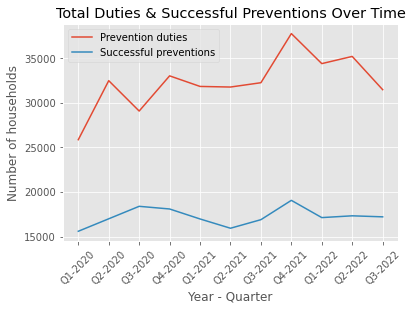

In [160]:
#Line chart showing how the total number of prevention cases have changed over time

plt.plot(total_per_quarter.index, total_per_quarter.values)
plt.plot(preventions_per_quarter.index, preventions_per_quarter.values)
plt.xticks(rotation=45)
plt.ylabel('Number of households')
plt.xlabel('Year - Quarter')
plt.title('Total Duties & Successful Preventions Over Time')
plt.legend(['Prevention duties', 'Successful preventions'])
plt.show()

In [161]:
#Creating function to create quarterly data for each homelessness reason

def data_per_quarter(column):
    grouped_df = df.groupby(['year', 'quarter'])[column].sum()
    grouped_df.index = grouped_df.index.map(lambda x: f"Q{x[1]}-{x[0]}")
    return grouped_df

PRS_quarterly = data_per_quarter('total_PRS')
SRS_quarterly = data_per_quarter('total_SRS')
supported_quarterly = data_per_quarter('SRS_supported')
family_quarterly = data_per_quarter('family')
friends_quarterly = data_per_quarter('friends')

prevention_reasons_by_quarter = [PRS_quarterly, SRS_quarterly, supported_quarterly, family_quarterly, friends_quarterly]

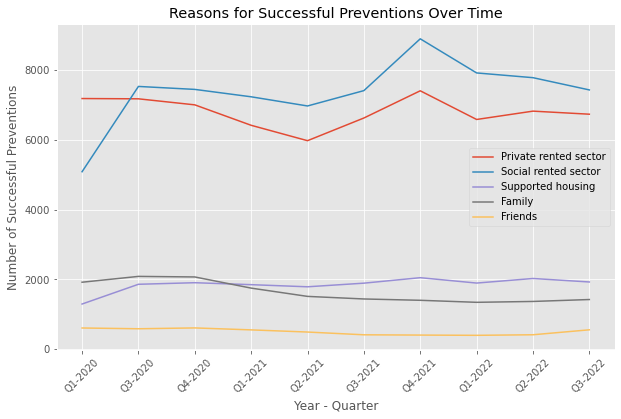

In [162]:
#Line chart showing how the reasons for homelessness have changed over time

fig = plt.subplots(figsize=(10,6))

for data in prevention_reasons_by_quarter:
    plt.plot(data.index, data.values)
plt.xticks(rotation=45)
plt.ylabel('Number of Successful Preventions')
plt.xlabel('Year - Quarter')
plt.title('Reasons for Successful Preventions Over Time')
plt.legend(['Private rented sector', 'Social rented sector', 'Supported housing', 'Family', 'Friends'])
plt.show()

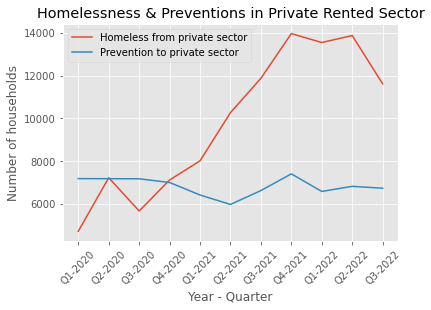

In [163]:
plt.plot(AST_quarterly.index, AST_quarterly.values)
plt.plot(PRS_quarterly.index, PRS_quarterly.values)
plt.xticks(rotation=45)
plt.ylabel('Number of households')
plt.xlabel('Year - Quarter')
plt.title('Homelessness & Preventions in Private Rented Sector')
plt.legend(['Homeless from private sector', 'Prevention to private sector'])
plt.show()

# Introducing area characteristics

In [165]:
master_df = pd.read_csv('C:/Users/lucyf/Coding/Homelessness/data/joined_df_with_census_data.csv')

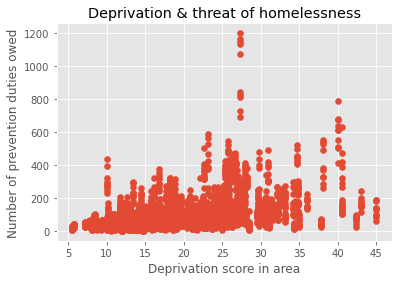

In [166]:
#Looking for any obvious correlation between deprivation in area and numbers threatened with homelessness

plt.scatter(master_df['deprivation_score'], master_df['total_prevention_duty'])
plt.ylabel('Number of prevention duties owed')
plt.xlabel('Deprivation score in area')
plt.title('Deprivation & threat of homelessness')
plt.show()

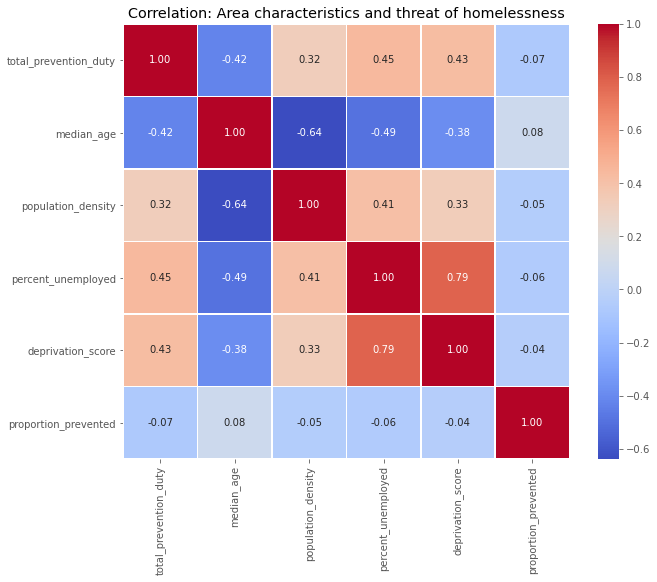

In [169]:
#Plotting a heatmap with the census data to look for any correlation

correlation_matrix = master_df[['total_prevention_duty', 'median_age', 'population_density',
                       'percent_unemployed', 'deprivation_score', 'proportion_prevented']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation: Area characteristics and threat of homelessness')
plt.show()

In [ ]:
#Creating an aggregated dataframe with just one row for each local authority, showing the mean quarterly data

grouped_df = master_df.groupby('local_authority', as_index=False).mean()
grouped_df[['region_name', 'ONS_code', 'region_code']] = df[['region_name', 'ONS_code', 'region_code']]

#Reducing the columns, taking out the more detailed breakdowns for reason for threat of homelessness and outcome

columns_to_keep = ['ONS_code', 'local_authority', 'total_prevention_duty', 'AST_total', 'non_AST_private_let', 'family_friends', 'relationship_breakdown', 'domestic_violence', 'other_violence', 'social_total', 'supported_total', 'institution', 'asylum_accommodation', 'other_x',
       'total_successful_prevention', 'total_PRS', 'total_SRS', 'family', 'friends', 'owner_occupier', 'other_y', 'not_known', 'region_code', 'region_name', 'median_age', 'population_density', 'number_unemployed', 'percent_unemployed', 'deprivation_score', 'proportion_prevented']
grouped_df = grouped_df[columns_to_keep]

# Introducing housing affordability

This data is the ratio of lower quartile house price to lower quartile gross annual (where available) residence-based earnings

In [189]:
master_df = pd.read_csv('C:/Users/lucyf/Coding/Homelessness/data/joined_df_with_census_data.csv')

affordability = pd.read_csv('C:/Users/lucyf/Coding/Homelessness/data/affordability.csv')

master_df = pd.merge(master_df, affordability, how='left', on=['ONS_code', 'local_authority', 'year'])

In [190]:
master_df.head()

master_df.dropna(axis=0, inplace=True)

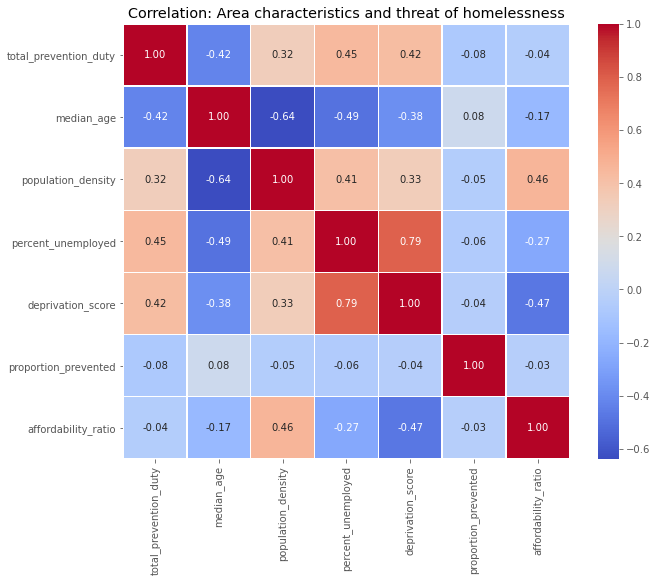

In [194]:
#Plotting a heatmap with the census data to look for any correlation

correlation_matrix = master_df[['total_prevention_duty', 'median_age', 'population_density',
                       'percent_unemployed', 'deprivation_score',  'proportion_prevented', 'affordability_ratio']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation: Area characteristics and threat of homelessness')
plt.show()

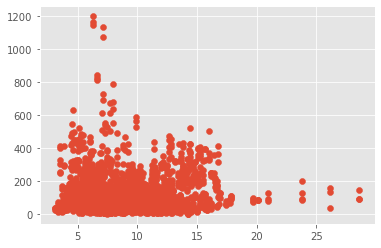

In [196]:
plt.scatter(master_df['affordability_ratio'], master_df['total_prevention_duty'])
plt.show()